## Introduction
This dataset will be all about the environmental impact of popular diets and foods. From carbon footprint to water use, we will explore how different foods can impact the environment.

Here is the list of six questions based on the dataset, we try to cover:

> **1) Which types of food have more negative impact on the environment? Which stage of food production contributes more to the greenhouse gas emmision?**

> **2) Which country has the highet meat consumption?**

# Setup data

In [67]:
#Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ssl 
# deal with geo data
import geopandas as gpd
# Create interactive map
import folium

# To vertify credential when accessing infromation from wikipedia without errors
ssl._create_default_https_context = ssl._create_unverified_context

# Explore Dataset

In [3]:
#Load Dataset into df
df = pd.read_csv('Food_Production.csv')
#Explore dataset
print(df.info())
df.head(n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [34]:
#Question 1: 
# Subset dataset by Highest Total Emission
emiss_df= df.iloc[:,0:9].sort_values(by = 'Total_emissions', ascending=False)


Food product       Beef (beef herd)Lamb & MuttonCheeseBeef (dairy...
Land use change                                                 54.2
Animal Feed                                                     19.5
Farm                                                           149.2
Processing                                                      10.9
Transport                                                        8.4
Packging                                                        11.6
Retail                                                           3.0
Total_emissions                                                256.8
dtype: object

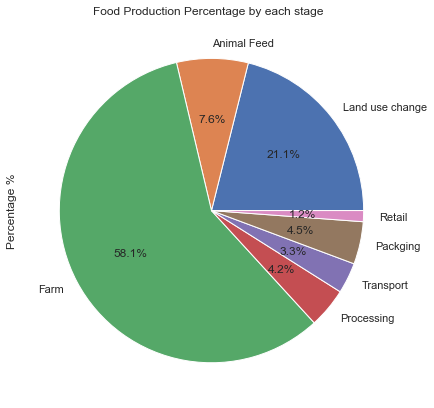

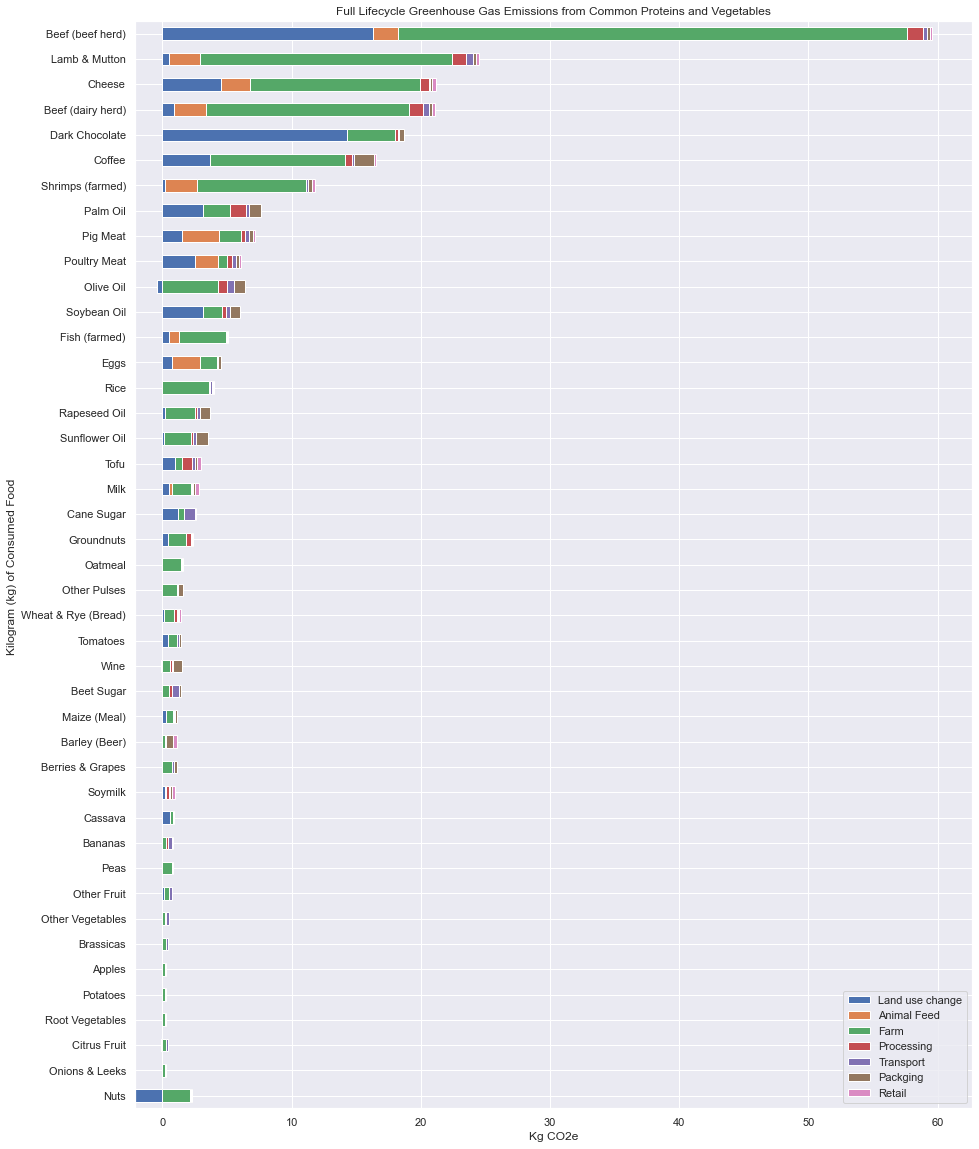

In [45]:
#change size of the figure [width, height]
plt.rcParams['figure.figsize'] = [15, 20]

#subplot
plt.subplot(121)
plotdata.iloc[:,1:8].sum().plot(kind='pie', figsize=(15,10), autopct='%1.1f%%')
plt.ylabel('Percentage %')
plt.title('Food Production Percentage by each stage  ')
#Create style base on seaborm
sns.set()
plotdata.plot(x = 'Food product', y= ['Land use change', 'Animal Feed', 'Farm', 'Processing','Transport', 'Packging', 'Retail'], kind='barh', stacked=True)
plt.ylabel('Kilogram (kg) of Consumed Food ')
plt.xlabel('Kg CO2e')
plt.title('Full Lifecycle Greenhouse Gas Emissions from Common Proteins and Vegetables')
#custome legend location 
plt.legend(loc=0)
plt.show()

## Summary
Farm is one of the biggest green house gas emission stage in the food production, which accounted for 56.1%. Land use change and Animal food source also contribute dramatically to the green house gas emission with 21.1% and 7.6% respectively. 

For the food product, Beef produced in beef herd is one of the biggest contribution to green house gas emission with more than 59.6 kgCO2. In contrast, beef produced with dairy herd generates half of the total emission compared to traditonal beef production, 21.1kgCo2 versus 59.6 KgCo2. 

Lamb & Mutton is also the second green house gas emission with 24.5 KgCo2. In the dataset, there is no report of Lamb & Mutton production with dairy heard. This type of food produce might also produce half of the green house gas emission like raising beef heard with dairy food source. 

#  Meat Consumption Map By Countries

In [49]:
url ="https://en.wikipedia.org/wiki/List_of_countries_by_meat_consumption"
tables = pd.read_html(url)
# The data is in the first table - this changes from time to time - wikipedia is updated all the time.
table = tables[0]
print(table.head())


               Country  kg/person (2002)[9][note 1] kg/person (2009)[10]  \
0              Albania                         38.2                 44.1   
1              Algeria                         18.3                 19.5   
2       American Samoa                         24.9                 26.8   
3               Angola                         19.0                 22.4   
4  Antigua and Barbuda                         56.0                 84.3   

  kg/person (2017) [11]  kg/person (2017)[12]  
0                 41.78                   NaN  
1                 20.32                   NaN  
2                   NaN                   NaN  
3                 23.43                   NaN  
4                 74.56                   NaN  


In [62]:
# read geopanda set
# get world map from geopandas website
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [92]:
#Merge world dataset with world meat consumption dataset together with left join
all_df = world.merge(table, how="left", left_on=['name'], right_on=['Country'])
# Remove Nan by columns
plot = all_df.dropna()

In [72]:
# Create interactive map with folium 
#to render map in jupyter notebook
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [91]:
# becareful with dtype of columns, do not use object columns 
my_map = folium.Map()

folium.Choropleth(
    geo_data=plot,
    name="choropleth",
    data=plot,
    columns=["Country", "kg/person (2017)[12]"],
    key_on="feature.properties.name",
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Meat consumption in kg/person",
).add_to(my_map)
folium.LayerControl().add_to(my_map)
#Display it
embed_map(my_map, "Meat Consumption.html")

USA, Australia, Canada and some South America Countries appear to be top meat consumption countries in the world. However, this information still lacks information of some Europian countries. 